<a href="https://colab.research.google.com/github/KryssyCo/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/My_Notes_Hypothesis_Testing_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LECTURE 1**

***Learn the role of hypothesis testing in inferential statistics***

**What we will learn:**:

**Descriptive statistics**

-  Standard deviation

**Inferential Statistics**
- **Null Hypothesis Significance Testing**
- Z- Scores
- Confidence Intervals

**How we'll learn:**

Computationally

- For- loops
- Random number generators


In [0]:
%matplotlib inline
import matplotlib as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
      

import random
from statistics import mean, stdev

In [0]:
#Standard deviation

apples = [.5, .4, .5, .6,.3, .7]
mean(apples)

0.5

In [0]:
pumpkins= [1, 1, 1, 3, 3,591]
mean(pumpkins)

100

**LESSON 2**

**Standard deviation** is a number used to tell how measurements for a group are spread out from the average (mean), or expected value. A low standard deviation means that most of the numbers are very glose to average. A high standard deviation means that the numbers are spread out.

In [0]:
mean(apples), stdev(apples)

(0.5, 0.1414213562373095)

In [0]:
mean(pumpkins), stdev(pumpkins)

(100, 240.54188824402289)

**LESSON 3**
*Learn how to calculate the z-score for a normal distribution*

2. Evaluate a hypothesis

Imagine a restaurant employ five dishwashers:
  - Alice
  - Bob
  - Carl
  - Dave
  - Eric
  
  One week, they break fie dishes - and Carl break 4 of the 5. So his coworkers have a **hypothesis**: Carl is clumsy!
  
  Carl says no, it was just bad luck and a random chance: it could have happened to anybody. We call this the null **hypotheses!**
  
  
  

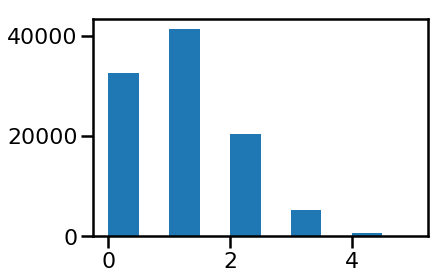

In [0]:
def test():
  dishwashers = ['Alice', 'Bob', 'Carl', 'dave', 'Eric']
  breakers = [random.choice(dishwashers) for broken_dish in range(5)]
  return breakers.count('Carl')
  
tests = [test() for _ in range(100000)]

from matplotlib.pyplot import hist  
from matplotlib.pyplot import hist
histogram1 = hist(tests)
  



In [0]:
mean(tests), stdev(tests)

(1.00494, 0.8961381740760017)

Here's the "**standard score":** of Carl breaking 4 dishes. It's over 3 standard deviations from the mean. 


In [0]:
standard_score = (4 - mean(tests)) /stdev(tests)
print(standard_score)

3.3421854872862364


Here's how often carl breaks 4+ dishes in our Monte Carlo simulation of the nul hypothesis:

In [0]:
sum(test>= 4 for test in tests)

733

As a percentage:

In [0]:
sum(test >= 4 for test in tests ) / len(tests)

0.00733

This is a **p-value.**

             Everyone I spoke with could tell me the technical definition of p-value - the probability of getting results at least as extreme as the ones you observed, given that the null hypothesis is correct - but almost no one could translate that into something easy to understand. - Not Even Scientists Can Easily Explain P-values

In [0]:
p_value = mean(test >= 4 for test in tests)
print(p_value)

0.00733


Reject the null hypothesis - yes

In [0]:
p_value < .05

True

(The p-value can be calculate in one line of code, but it becomes harder to read)

In [0]:
mean(sum(random.choice('abcde') =="c" for _ in range(5)) >=4 for _ in range(100000))

0.00699

**How could we do it without computer programming superpowers?**

1. Five sided dice and a lot of patience? (Half a million rolls)
2. Or with combinatorial probability:

There are 4*5 ways to get 4 C's

    CCCCA
    CCCCB
    CCCCD
    CCCCE
    
    ...
    
    ...
    ECCCC
    
    And one way to get 5 C's
    Out of 5**% total pissibilities

In [0]:
(4*5 + 1) / 5**5

0.00672

**Lesson 4**

**3.   Are beer drinkers more attractive to mosquitoes?**

**Background**

Malaria and alcohol consuption both represent major public health problems. Alcohol consumption is rising in developing countries and, as efforts to manage maleria are expanded, understanding the links between malaria and alcohol consumption becomes crucial. Our aim was to ascertain the effect of beer consumption on human attractiveness to malaria mosquitoes in semi field conditions in Burkina faso.

**"Then they trapped and counted the mosquitos. Here's the data."**

These are the numbers that were collected in the traps for each of the volunteers

In [0]:
beer =[27, 19, 20, 20, 23, 17, 21, 24, 31, 26, 28, 20, 27, 19, 25, 31, 24, 28, 24, 29, 21, 21, 18, 27, 20]
water = [21, 19, 13, 22, 15, 22, 15, 22, 20, 12, 24, 24, 21, 19, 18, 16, 23, 20]

**They had 25 volunteers who drank beer and 18 who drank water.**

In [0]:
len(beer), len(water)

(25, 18)

We can compute the average number of mosquitos in each group...

In [0]:
mean(beer), stdev(beer)


(23.6, 4.133198922545748)

In [0]:
mean(water), stdev(water)

(19.22222222222222, 3.6711202899124045)

**...and then subtract to find that the average person who drank beer attracted 4.4 more mosquitoes than the average water drinker.**



In [0]:
effect_size = mean(beer) - mean(water)
print(effect_size)

4.37777777777778


**And now we have a statistical question.**

Is a difference of 4.4 sufficient evidence to claim that drinking beer makes you more attractive to mosquitoes?

**Permutatuion Test**

If the skeptic( the null hypothesis) is right, these labels(beer or water) have absolutely no meaning. They carry no information....

And so what I can do is randomly shuffle them, then compute some new means, subtract the means, and get a new difference...


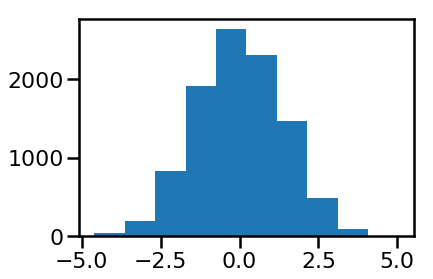

In [0]:
def test():
    #shuffle the data
    combined = beer + water
    random.shuffle(combined)
     # split into two groups
    split = len(beer)
    group1 = combined[:split]
    group2 = combined[split:]
    
    #compare the means
    return mean(group1) - mean(group2)
tests = [test() for _ in range(10000)]
  
from matplotlib.pyplot import hist
histogram1 = hist(tests)

Under the null hypothesis, here's the mean number of mosquitoes attracted by beer drinkers versus water drinkers, and the standar deviation:

In [0]:
mean(tests), stdev(tests)

(0.007897999999999999, 1.3594810202467185)

The observed effect size of 4.4 more mosquitoes attracted by beer drinkers is over 3 standard deviations from the mean under the null hypothesis. (This is the z-score)

In [0]:
standard_score = (effect_size - mean(tests)) / stdev(tests)
print(standard_score)

3.2143735092268773


Here is the p-value: the probability of getting results at least as extreme as the ones you observed, if you assumed that the null hypothesis is correct.

In [0]:
p_value = mean(test >= effect_size for test in tests)
print(p_value)

0.0003


Reject the null hypothesis?

In [0]:
p_value < .05

True

**How else could we do it?**

We did a null hypothesis significance testing computationally, using a permutation test.

We could also do it analytically, using a t-test

In [0]:
from statsmodels.stats.weightstats import ttest_ind
test_statistic, p_value, degrees_of_freedom = ttest_ind(beer, water, alternative='larger', usevar='unequal')
p_value

0.00037370095395207643

**Lesson 5**
*Learn how to find the confidence interval of a distribution*

A **confidence interval** is a partial answer to the question: "How precise is my estimate of the effect size?"" If you run an experiment and observe an effect, you might wonder wher you would see the same thing if you ran the experiment again

In [0]:
import seaborn as sns
sns.set_context('poster')



In [0]:
plt.figure(figsize=(20, 2))           #Use teachers notes for this.
plt.xlim(0, 26)
plt.title('Mosquitoes per water drinker, on average')
sns.barplot(beer, ci=95)

plt.figure(figsize=(20, 2))
pl.xlim(0, 26)
plt.title('Mosquitoes per water drinker, on average')
sns.barplot(beer, ci=95)

TypeError: ignored

In [0]:
def bootstrap_sample(items):
  # Random resample *with replacement*
  return random.choices(items, k=len(items))

In [0]:
sorted(water), mean(water)

([12, 13, 15, 15, 16, 18, 19, 19, 20, 20, 21, 21, 22, 22, 22, 23, 24, 24],
 19.22222222222222)

In [0]:
sample = bootstrap_sample(water)
sorted(sample), mean(sample)

([12, 15, 15, 16, 16, 16, 16, 18, 18, 19, 19, 20, 20, 21, 22, 22, 22, 24],
 18.38888888888889)

In [0]:
sample = bootstrap_sample(water)
sorted(sample), mean(sample)

([12, 13, 13, 15, 15, 16, 18, 19, 20, 20, 22, 22, 22, 22, 22, 22, 23, 24],
 18.88888888888889)

In [0]:
effect_sizes = [mean(bootstrap_sample(beer)) - mean(bootstrap_sample(water)) for _ in range(10000)]

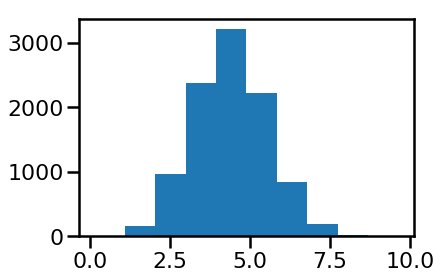

In [0]:
from matplotlib.pyplot import hist
histogram1 = hist(effect_sizes)

In [0]:
def percentile(x, p):
  # x: list of numbers
  #p = Percentile between o and 100
  i = round(len(x) * p/100)
  return sorted(x)[i]

percentile(effect_sizes, 2.5), percentile(effect_sizes, 97.5)

(2.1822222222222223, 6.733333333333331)